In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
def load_data(filename):
    df=pd.read_csv(filename,sep='\t')
    df['DateTime']=pd.to_datetime(df['DateTime']).dt.round('15min')
    return df

sales_data = load_data("data/sales_data.csv")
sales_data

,DateTime,Sales
0,2017-02-19 13:00:00,107.90
1,2017-02-19 13:15:00,115.05
2,2017-02-19 13:30:00,121.94
3,2017-02-19 13:45:00,104.52
4,2017-02-19 14:00:00,103.09
...,...,...
66309,2021-07-31 19:45:00,107.90
66310,2021-07-31 20:00:00,108.94
66311,2021-07-31 20:15:00,105.04
66312,2021-07-31 20:30:00,111.80


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66314 entries, 0 to 66313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  66314 non-null  datetime64[ns]
 1   Sales     66314 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 MB


In [4]:
def sales_duration(data):
    data.date = pd.to_datetime(data.DateTime)
    number_of_days = data.DateTime.max() - data.DateTime.min()
    number_of_years = number_of_days.days / 365
    print(number_of_days.days, 'days')
    print(round(number_of_years,2), 'years')
    
sales_duration(sales_data)
sales_data

1623 days
4.45 years


c:\users\rick\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,DateTime,Sales
0,2017-02-19 13:00:00,107.90
1,2017-02-19 13:15:00,115.05
2,2017-02-19 13:30:00,121.94
3,2017-02-19 13:45:00,104.52
4,2017-02-19 14:00:00,103.09
...,...,...
66309,2021-07-31 19:45:00,107.90
66310,2021-07-31 20:00:00,108.94
66311,2021-07-31 20:15:00,105.04
66312,2021-07-31 20:30:00,111.80


In [5]:
sales_data.Sales.describe()

count    66314.000000
mean       106.048718
std         13.063616
min          0.000000
25%         98.020000
50%        103.090000
75%        110.630000
max        836.550000
Name: Sales, dtype: float64

c:\users\rick\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


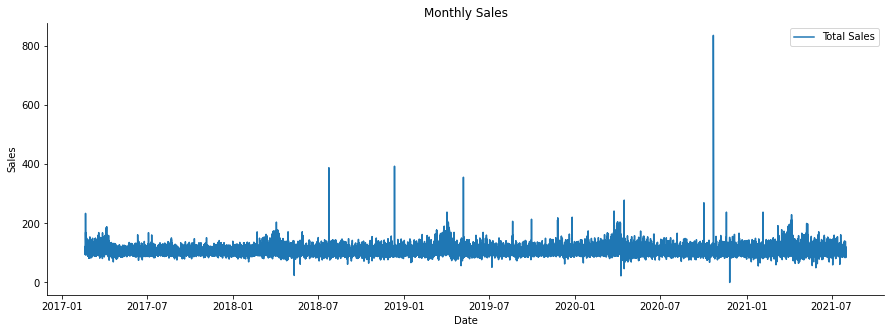

In [7]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, label='Total Sales')
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = title)
    
    sns.despine()
time_plot(sales_data, 'DateTime', 'Sales', 'Monthly Sales')